<a href="https://colab.research.google.com/github/secoxx/IE423/blob/main/secil_hackathon_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib
from sklearn.preprocessing import scale, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier


In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
file_path = "/content/drive/MyDrive/ie423-hackathon/music_genre_segments_features.xlsx"
df = pd.read_excel(file_path)
df.head()

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,...,chroma_stft_9,chroma_stft_10,chroma_stft_11,chroma_stft_12,zero_crossing_rate,rmse,tempo,segment,songname,genre
0,-211.962082,143.157791,0.667030,45.097946,4.997725,9.446491,-3.055244,6.647664,-6.001249,-2.285960,...,0.445213,0.348888,0.334939,0.307490,0.049938,0.096314,151.999081,start,3 Hürel - Ve Ölüm (1970).mp3,anadolu_rock
1,-126.205444,123.874397,-13.301916,38.512249,-0.581136,5.504980,-6.915196,6.381064,-6.132162,3.680864,...,0.380831,0.380414,0.343936,0.271269,0.072488,0.110688,123.046875,middle,3 Hürel - Ve Ölüm (1970).mp3,anadolu_rock
2,-161.283386,114.781235,-7.509427,36.211304,-0.213040,1.931668,-6.400823,4.157255,-8.238170,4.074484,...,0.373151,0.390854,0.390170,0.283700,0.087776,0.099083,99.384014,end,3 Hürel - Ve Ölüm (1970).mp3,anadolu_rock
3,-192.182007,64.981163,0.655698,20.179604,-3.858071,15.158121,0.100480,9.428003,2.986673,10.928973,...,0.370772,0.444374,0.354786,0.296503,0.156996,0.065267,86.132812,start,Alla Beni Pulla Beni.mp3,anadolu_rock
4,-86.601433,50.922188,10.484071,16.654398,-2.318950,2.100653,1.305926,9.077596,-10.125114,5.505144,...,0.247612,0.388324,0.397910,0.261870,0.155334,0.138522,172.265625,middle,Alla Beni Pulla Beni.mp3,anadolu_rock


In [ ]:
df['genre'].unique()

array(['anadolu_rock', 'arabesk', 'hip_hop', 'pop', 'turk_sanat', 'turku'],
      dtype=object)

In [ ]:
df.isna().sum()

mfcc_1                 0
mfcc_2                 0
mfcc_3                 0
mfcc_4                 0
mfcc_5                 0
mfcc_6                 0
mfcc_7                 0
mfcc_8                 0
mfcc_9                 0
mfcc_10                0
mfcc_11                0
mfcc_12                0
mfcc_13                0
spectral_centroid      0
spectral_bandwidth     0
spectral_contrast_1    0
spectral_contrast_2    0
spectral_contrast_3    0
spectral_contrast_4    0
spectral_contrast_5    0
spectral_contrast_6    0
spectral_contrast_7    0
spectral_rolloff       0
chroma_stft_1          0
chroma_stft_2          0
chroma_stft_3          0
chroma_stft_4          0
chroma_stft_5          0
chroma_stft_6          0
chroma_stft_7          0
chroma_stft_8          0
chroma_stft_9          0
chroma_stft_10         0
chroma_stft_11         0
chroma_stft_12         0
zero_crossing_rate     0
rmse                   0
tempo                  0
segment                0
songname               0


In [ ]:
df.describe(include='all')

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,...,chroma_stft_9,chroma_stft_10,chroma_stft_11,chroma_stft_12,zero_crossing_rate,rmse,tempo,segment,songname,genre
count,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,...,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,1839,1839,1839
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,609,6
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start,Unutamadım.mp3,hip_hop
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,613,6,471
mean,-151.932214,94.916620,-3.233943,22.463686,1.882744,5.210782,-1.757918,3.474415,-5.811740,2.840206,...,0.328723,0.358185,0.334232,0.340705,0.094474,0.145869,120.261908,NaN,NaN,NaN
std,89.749490,26.328798,21.702915,13.007179,10.680932,10.051133,7.441417,7.091848,6.854171,5.977279,...,0.123900,0.132593,0.119612,0.124523,0.033687,0.066874,29.650599,NaN,NaN,NaN
min,-1131.370972,0.000000,-128.948883,-45.734013,-43.115242,-53.862484,-36.366859,-35.121941,-38.809952,-25.140015,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,-200.978821,77.885494,-16.032721,14.611707,-3.929271,0.096839,-6.094213,-0.305759,-9.614433,-0.800586,...,0.239067,0.265714,0.245867,0.247845,0.071648,0.096351,95.703125,NaN,NaN,NaN
50%,-140.376602,93.127998,-1.277925,23.079899,2.481976,6.366985,-1.510053,4.122401,-5.430929,2.973547,...,0.317253,0.350883,0.325665,0.333093,0.090560,0.139977,117.453835,NaN,NaN,NaN
75%,-91.715912,110.115959,11.082134,30.870625,8.412067,11.584309,2.787587,7.947865,-1.340265,6.543468,...,0.407279,0.439899,0.408561,0.420011,0.114737,0.189432,135.999178,NaN,NaN,NaN


We don't have any na values and we have 1839 instances among all columns.

In [ ]:
df_numeric = df.select_dtypes(include=np.number)
corr = df_numeric.corr()
corr.style.background_gradient(cmap='coolwarm')

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,spectral_centroid,spectral_bandwidth,spectral_contrast_1,spectral_contrast_2,spectral_contrast_3,spectral_contrast_4,spectral_contrast_5,spectral_contrast_6,spectral_contrast_7,spectral_rolloff,chroma_stft_1,chroma_stft_2,chroma_stft_3,chroma_stft_4,chroma_stft_5,chroma_stft_6,chroma_stft_7,chroma_stft_8,chroma_stft_9,chroma_stft_10,chroma_stft_11,chroma_stft_12,zero_crossing_rate,rmse,tempo
mfcc_1,1.000000,-0.106409,-0.078617,0.172820,-0.019402,0.147416,0.012341,0.179110,0.016535,0.171588,0.001766,0.166747,0.027029,0.503836,0.562241,0.115873,-0.067788,-0.050409,-0.047199,-0.044588,-0.055470,0.351094,0.516914,0.199156,0.194567,0.155142,0.144877,0.128632,0.159102,0.194360,0.191854,0.206439,0.188540,0.205923,0.199226,0.360397,0.710769,0.068055
mfcc_2,-0.106409,1.000000,-0.206105,-0.094740,0.021042,-0.233707,-0.050726,-0.182708,-0.189030,-0.162338,-0.177906,-0.222282,-0.153506,-0.773578,-0.652239,0.264851,0.310723,0.273561,0.262495,0.338175,0.420095,0.152346,-0.757595,-0.192202,-0.210535,-0.147087,-0.150855,-0.096957,-0.104578,-0.120367,-0.073497,-0.165716,-0.136186,-0.184632,-0.207053,-0.619356,-0.045481,0.040736
mfcc_3,-0.078617,-0.206105,1.000000,0.241858,0.383739,0.483106,0.195245,0.341124,0.197870,0.157552,0.239085,0.219605,0.139329,0.071679,0.376684,0.054005,-0.194142,-0.125401,-0.104829,-0.186611,-0.378085,-0.176753,0.229060,0.187223,0.240872,0.230743,0.273568,0.217100,0.223166,0.198230,0.156059,0.209744,0.172912,0.231851,0.191289,-0.281771,0.136267,-0.081149
mfcc_4,0.172820,-0.094740,0.241858,1.000000,0.197852,0.497573,0.127913,0.315632,0.206562,0.163347,0.118404,0.146298,0.059806,0.049046,0.129230,0.078834,-0.102017,-0.085916,-0.087343,-0.134880,-0.153320,0.241028,0.096394,0.153842,0.155565,0.138831,0.143921,0.115494,0.162495,0.168418,0.154417,0.146386,0.122557,0.183320,0.143335,-0.044594,0.149392,-0.003551
mfcc_5,-0.019402,0.021042,0.383739,0.197852,1.000000,0.143840,0.481856,0.316177,0.308173,0.279100,0.261993,0.165777,0.221750,-0.047731,0.164770,0.110237,-0.147347,-0.186389,-0.208650,-0.127741,0.091510,-0.304048,0.033255,0.178295,0.220910,0.171773,0.211408,0.181708,0.226448,0.257460,0.202943,0.273451,0.239145,0.257109,0.207750,-0.240665,0.126004,-0.072556
mfcc_6,0.147416,-0.233707,0.483106,0.497573,0.143840,1.000000,0.167713,0.575619,0.409378,0.233998,0.390638,0.353231,0.193316,0.149047,0.302640,-0.012603,-0.313435,-0.288606,-0.185682,-0.150786,-0.523863,0.152426,0.251299,0.235527,0.300981,0.270705,0.311217,0.248797,0.299195,0.229401,0.194196,0.263149,0.227147,0.289759,0.219063,-0.053147,0.201434,-0.021571
mfcc_7,0.012341,-0.050726,0.195245,0.127913,0.481856,0.167713,1.000000,0.275608,0.444999,0.356767,0.282694,0.311297,0.374307,0.010178,0.124415,0.057698,-0.240568,-0.260874,-0.121140,-0.218246,0.076909,-0.339203,0.053945,0.239602,0.281930,0.162126,0.233674,0.204127,0.232324,0.255583,0.197843,0.303998,0.234125,0.247063,0.243827,-0.108513,0.111689,-0.079139
mfcc_8,0.179110,-0.182708,0.341124,0.315632,0.316177,0.575619,0.275608,1.000000,0.385044,0.451843,0.370022,0.316935,0.324267,0.182035,0.312634,-0.001449,-0.359040,-0.356352,-0.184579,-0.213052,-0.289630,0.127269,0.262760,0.258151,0.304094,0.238464,0.293746,0.224764,0.301457,0.336055,0.274511,0.359684,0.328567,0.392411,0.321628,-0.015259,0.214845,-0.000882
mfcc_9,0.016535,-0.189030,0.197870,0.206562,0.308173,0.409378,0.444999,0.385044,1.000000,0.276091,0.451347,0.397735,0.322246,0.103767,0.163564,-0.088685,-0.349165,-0.353517,-0.167844,-0.123137,-0.239569,-0.236305,0.139794,0.247910,0.296881,0.254109,0.266327,0.238163,0.278269,0.265423,0.248319,0.336400,0.325096,0.355010,0.290393,0.000971,0.091985,-0.056677
mfcc_10,0.171588,-0.162338,0.157552,0.163347,0.279100,0.233998,0.356767,0.451843,0.276091,1.000000,0.354398,0.420395,0.309253,0.180329,0.253637,-0.066094,-0.231688,-0.258216,-0.197483,-0.178492,-0.033475,0.046343,0.227778,0.148864,0.253450,0.171694,0.237458,0.259407,0.2

In [ ]:
fig = px.imshow(corr, text_auto=True)
fig.update_layout(title='Heatmap of Correlation',
                  width=800)
fig.show()

In [ ]:
df.groupby('genre').count()

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,...,chroma_stft_8,chroma_stft_9,chroma_stft_10,chroma_stft_11,chroma_stft_12,zero_crossing_rate,rmse,tempo,segment,songname
genre,,,,,,,,,,,,,,,,,,,,,
anadolu_rock,243,243,243,243,243,243,243,243,243,243,...,243,243,243,243,243,243,243,243,243,243
arabesk,288,288,288,288,288,288,288,288,288,288,...,288,288,288,288,288,288,288,288,288,288
hip_hop,471,471,471,471,471,471,471,471,471,471,...,471,471,471,471,471,471,471,471,471,471
pop,189,189,189,189,189,189,189,189,189,189,...,189,189,189,189,189,189,189,189,189,189
turk_sanat,375,375,375,375,375,375,375,375,375,375,...,375,375,375,375,375,375,375,375,375,375
turku,273,273,273,273,273,273,273,273,273,273,...,273,273,273,273,273,273,273,273,273,273


In [ ]:
fig = px.histogram(df, x="genre",color='genre')
fig.update_layout(title='Distribution of Genres',
                  width=1000)
fig.show()

In [ ]:
df

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,...,chroma_stft_9,chroma_stft_10,chroma_stft_11,chroma_stft_12,zero_crossing_rate,rmse,tempo,segment,songname,genre
0,-211.962082,143.157791,0.667030,45.097946,4.997725,9.446491,-3.055244,6.647664,-6.001249,-2.285960,...,0.445213,0.348888,0.334939,0.307490,0.049938,0.096314,151.999081,start,3 Hürel - Ve Ölüm (1970).mp3,anadolu_rock
1,-126.205444,123.874397,-13.301916,38.512249,-0.581136,5.504980,-6.915196,6.381064,-6.132162,3.680864,...,0.380831,0.380414,0.343936,0.271269,0.072488,0.110688,123.046875,middle,3 Hürel - Ve Ölüm (1970).mp3,anadolu_rock
2,-161.283386,114.781235,-7.509427,36.211304,-0.213040,1.931668,-6.400823,4.157255,-8.238170,4.074484,...,0.373151,0.390854,0.390170,0.283700,0.087776,0.099083,99.384014,end,3 Hürel - Ve Ölüm (1970).mp3,anadolu_rock
3,-192.182007,64.981163,0.655698,20.179604,-3.858071,15.158121,0.100480,9.428003,2.986673,10.928973,...,0.370772,0.444374,0.354786,0.296503,0.156996,0.065267,86.132812,start,Alla Beni Pulla Beni.mp3,anadolu_rock
4,-86.601433,50.922188,10.484071,16.654398,-2.318950,2.100653,1.305926,9.077596,-10.125114,5.505144,...,0.247612,0.388324,0.397910,0.261870,0.155334,0.138522,172.265625,middle,Alla Beni Pulla Beni.mp3,anadolu_rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1834,-170.919403,152.829453,35.202385,23.663361,10.234225,9.499555,-10.564711,6.840081,-13.406256,5.893716,...,0.191853,0.140660,0.097936,0.107211,0.039847,0.261843,161.499023,middle,Şifa İstemem Balından.mp3,turku
1835,-217.157364,108.634369,35.908585,10.764547,0.774968,8.543186,-5.925943,8.953652,-19.557627,14.778088,...,0.133047,0.124501,0.102802,0.128177,0.052215,0.181993,161.499023,end,Şifa İstemem Balından.mp3,turku
1836,-172.185471,137.361679,19.296658,27.775499,4.423500,1.596702,6.834544,-0.011450,-2.359347,10.949736,...,0.506211,0.434778,0.312589,0.401980,0.041338,0.132655,135.999178,start,Şu Yalan Dünyaya Geldim Geleli.mp3,turku
1837,-151.857010,130.583176,4.710496,22.181738,15.102857,6.136424,1.802944,2.816019,-9.627778,8.517433,...,0.401153,0.398088,0.285769,0.324540,0.067853,0.145005,135.999178,middle,Şu Yalan Dünyaya Geldim Geleli.mp3,turku


In [ ]:
from sklearn.preprocessing import scale, LabelEncoder
from sklearn.model_selection import train_test_split
le = LabelEncoder()
df['songname_encoded'] = le.fit_transform(df['songname'])
df['segment_encoded']  = le.fit_transform(df['segment'])
df['genre_encoded'] = le.fit_transform(df['genre'])

y = df['genre_encoded']
X = scale(df.drop(columns=['genre_encoded','genre','songname','segment']), axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8, test_size=0.2,random_state=1)

In [ ]:
X

array([[-7.11250673e-01, -3.93739726e-04, -2.85622906e-01, ...,
         1.73042056e-02, -2.82954650e-01, -2.82954650e-01],
       [-4.65693994e-01, -9.64560215e-02, -2.98994153e-01, ...,
        -9.76778418e-02, -2.76401174e-01, -2.77877655e-01],
       [-4.98376581e-01, -1.18525807e-01, -2.86791492e-01, ...,
        -1.39711593e-01, -2.73707008e-01, -2.76458905e-01],
       ...,
       [-6.41840892e-01, -5.67702945e-02, -2.79923287e-01, ...,
        -5.93455388e-02,  8.32776399e-01, -3.12615449e-01],
       [-5.61850833e-01, -9.54584621e-02, -3.03311525e-01, ...,
        -8.65150393e-02,  6.92898069e-01, -3.09438652e-01],
       [-5.66967835e-01, -1.12871493e-01, -2.90891444e-01, ...,
        -9.28073549e-02,  6.49642288e-01, -3.06731857e-01]])

In [ ]:
df.sample(10)

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,...,chroma_stft_12,zero_crossing_rate,rmse,tempo,segment,songname,genre,genre_encoded,songname_encoded,segment_encoded
1512,-167.573273,65.915695,-22.685904,20.615675,-4.800386,9.209382,-2.464892,2.534245,-4.369890,-4.203916,...,0.361322,0.155032,0.050709,117.453835,start,[SPOTIFY-DOWNLOADER.COM] Olmadı.mp3,turk_sanat,4,526,2
720,-168.099564,105.473900,-30.275110,24.502661,-3.977473,-8.445677,3.308638,3.390918,-10.528969,6.572762,...,0.241772,0.090232,0.137245,198.768029,start,Sabah Bastı Geceyi (Savaş Çocukları Part 2).mp3,hip_hop,2,312,2
1672,-121.807976,119.950516,-2.350212,29.263502,10.117742,-0.645168,1.388337,8.800120,-13.927368,2.947016,...,0.328185,0.063447,0.154889,83.354335,middle,Yarim Senden Ayrılalı - Erkan Oğur.mp3,turku,5,419,1
1409,-205.385590,76.655815,-42.653049,31.073696,-17.966337,7.937714,-9.835069,-0.124844,-9.298143,8.879741,...,0.418396,0.118986,0.097821,103.359375,end,[SPOTIFY-DOWNLOADER.COM] Adını Anmayacağım.mp3,turk_sanat,4,434,0
1348,-206.344666,105.818596,-21.254831,16.280310,-14.001666,-9.579370,-7.039534,-14.983109,-19.980997,-0.250363,...,0.091457,0.079593,0.108463,198.768029,middle,Nesrin Sipahi - İçimde Nice Uzun Yılların (Off...,turk_sanat,4,289,1
262,-124.136040,103.013412,-20.479456,21.284670,12.889946,-2.858549,7.802976,-3.152383,-15.099803,7.525516,...,0.403198,0.120119,0.099220,78.302557,middle,Başkasımı Var.mp3,arabesk,1,55,1
1753,-121.375992,80.182327,9.306405,24.844542,-7.907863,-15.944667,-14.403526,-3.807022,-20.961876,0.012954,...,0.324828,0.078201,0.237716,129.199219,middle,[SPOTIFY-DOWNLOADER.COM] Küçük Kelebek.mp3,turku,5,508,1
1262,-140.529633,119.569275,-25.782835,13.337921,-4.596415,-2.624732,-7.228316,9.007253,-6.819606,-1.152349,...,0.535082,0.110346,0.123201,92.285156,end,Elbet Birgün Buluşacağız.mp3,turk_sanat,4,138,0
1471,-212.558044,166.487747,-33.618534,2.873068,-4.706133,-6.667923,-4.684098,-5.184371,-13.934729,1.474991,...,0.145784,0.060608,0.117081,123.046875,middle,[SPOTIFY-DOWNLOADER.COM] Gördüm Seni Bir Gün.mp3,turk_sanat,4,485,1
1274,-204.651459,91.796005,-8.962117,6.740939,11.317435,-5.750054,1.601403,2.274656,-9.359062,-3.152179,...,0.237343,0.130006,0.065232,99.384014,end,Eski Dostlar.mp3,turk_sanat,4,151,0


In [ ]:
from sklearn.linear_model import LogisticRegression


mdlLgr = LogisticRegression(random_state=1)
mdlLgr.fit(X_train, y_train)
y_test_pred = mdlLgr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
df.groupby('genre').count()

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,...,chroma_stft_11,chroma_stft_12,zero_crossing_rate,rmse,tempo,segment,songname,genre_encoded,songname_encoded,segment_encoded
genre,,,,,,,,,,,,,,,,,,,,,
anadolu_rock,243,243,243,243,243,243,243,243,243,243,...,243,243,243,243,243,243,243,243,243,243
arabesk,288,288,288,288,288,288,288,288,288,288,...,288,288,288,288,288,288,288,288,288,288
hip_hop,471,471,471,471,471,471,471,471,471,471,...,471,471,471,471,471,471,471,471,471,471
pop,189,189,189,189,189,189,189,189,189,189,...,189,189,189,189,189,189,189,189,189,189
turk_sanat,375,375,375,375,375,375,375,375,375,375,...,375,375,375,375,375,375,375,375,375,375
turku,273,273,273,273,273,273,273,273,273,273,...,273,273,273,273,273,273,273,273,273,273


In [ ]:
y_test.value_counts()

genre_encoded
2    95
4    83
1    58
5    48
0    47
3    37
Name: count, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix

print ('Confusion Matrix:')
print (confusion_matrix(y_test, y_test_pred))

Confusion Matrix:
[[ 1  8 24  8  6  0]
 [ 3 20 19  8  8  0]
 [ 3 13 72  2  5  0]
 [ 2  3 14 16  2  0]
 [ 3 10 19  1 48  2]
 [ 0  1 22  6 15  4]]


In [ ]:
from sklearn.metrics import classification_report

print ('Classification Report (Logistic Regression):')
print (classification_report(y_test, y_test_pred))

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.08      0.02      0.03        47
           1       0.36      0.34      0.35        58
           2       0.42      0.76      0.54        95
           3       0.39      0.43      0.41        37
           4       0.57      0.58      0.57        83
           5       0.67      0.08      0.15        48

    accuracy                           0.44       368
   macro avg       0.42      0.37      0.34       368
weighted avg       0.43      0.44      0.39       368



In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
# ... (rest of your code)

# Use MinMaxScaler instead of scale to ensure non-negative values
scaler = MinMaxScaler()
X = scaler.fit_transform(df.drop(columns=['genre_encoded','genre','songname','segment']))

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8, test_size=0.2,random_state=1)

from sklearn.naive_bayes import MultinomialNB


mdlMNB = MultinomialNB()
mdlMNB.fit(X_train, y_train)
y_test_pred = mdlMNB.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

print ('Classification Report (Logistic Regression):')
print (classification_report(y_test, y_test_pred))

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.00      0.00      0.00        58
           2       0.31      0.92      0.47        95
           3       0.00      0.00      0.00        37
           4       0.48      0.52      0.50        83
           5       0.00      0.00      0.00        48

    accuracy                           0.35       368
   macro avg       0.13      0.24      0.16       368
weighted avg       0.19      0.35      0.23       368



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Results (Support Vector Classifier):

Classification Report:
              precision    recall  f1-score   support

anadolu_rock       0.55      0.38      0.45        47
     arabesk       0.49      0.59      0.54        58
     hip_hop       0.76      0.79      0.77        95
         pop       0.65      0.54      0.59        37
  turk_sanat       0.64      0.64      0.64        83
       turku       0.53      0.58      0.55        48

    accuracy                           0.62       368
   macro avg       0.60      0.59      0.59       368
weighted avg       0.62      0.62      0.62       368

AUC Score:


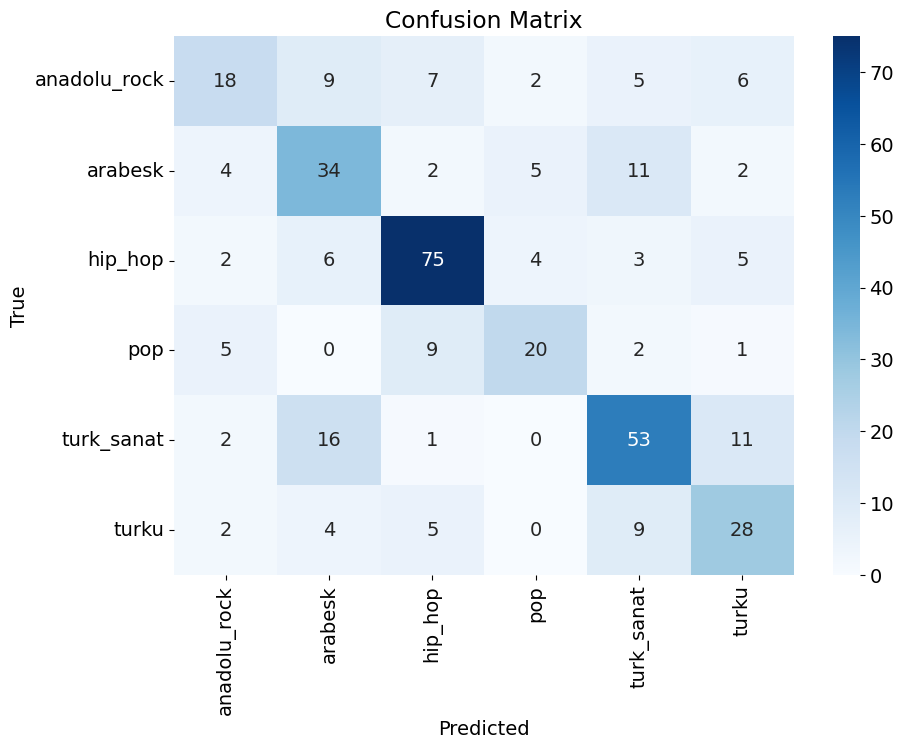

In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
# ... (rest of your code)

# Use MinMaxScaler instead of scale to ensure non-negative values
scaler = MinMaxScaler()
X = scaler.fit_transform(df.drop(columns=['genre_encoded','genre','songname','segment']))

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8, test_size=0.2,random_state=1)

# Build Support Vector Machines - Classifier model

from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

mdlSvm = SVC(probability=True) # Set probability to True to enable probability estimates
mdlSvm.fit(X_train, y_train)
y_test_pred = mdlSvm.predict(X_test) # Use predict_proba to get probabilities

print ('Results (Support Vector Classifier):\n')

print ('Classification Report:')
print (classification_report(y_test, y_test_pred,target_names=le.classes_)) # Get class predictions from probabilities

print ('AUC Score:')
svm_proba = mdlSvm.predict_proba(X_test)

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import plotly.express as px
fig = px.box(df, x="segment", y="tempo",color='genre')
fig.show()

In [ ]:
fig = px.box(df, x="segment", y="spectral_centroid",color='genre')
fig.show()

In [ ]:
y.unique()

array([0, 1, 2, 3, 4, 5])

Accuracy from default XGBoost model:
0.7472826086956522
Classification Report from default XGBoost model:
              precision    recall  f1-score   support

anadolu_rock       0.61      0.57      0.59        47
     arabesk       0.72      0.79      0.75        58
     hip_hop       0.86      0.85      0.86        95
         pop       0.65      0.70      0.68        37
  turk_sanat       0.78      0.73      0.76        83
       turku       0.71      0.71      0.71        48

    accuracy                           0.75       368
   macro avg       0.72      0.73      0.72       368
weighted avg       0.75      0.75      0.75       368



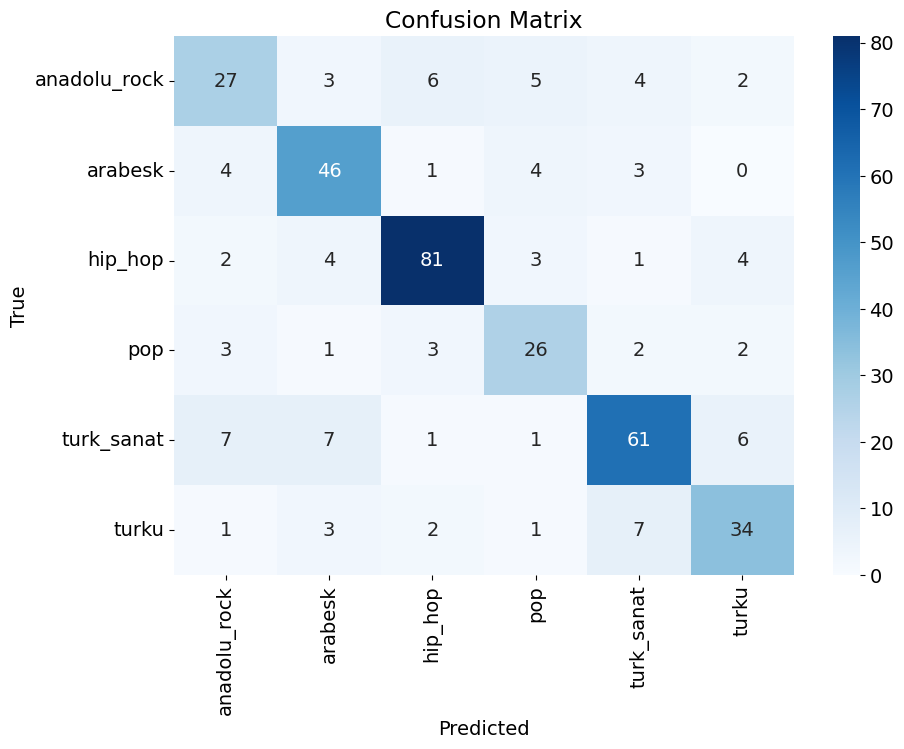

In [ ]:
from sklearn.preprocessing import MinMaxScaler,scale,LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

le = LabelEncoder()
df['songname_encoded'] = le.fit_transform(df['songname'])
df['segment_encoded']  = le.fit_transform(df['segment'])
df['genre_encoded'] = le.fit_transform(df['genre'])

y = df['genre_encoded']
# X = scale(df.drop(columns=['genre_encoded','genre','songname','segment']), axis=1)
scaler = MinMaxScaler()
X = scaler.fit_transform(df.drop(columns=['genre_encoded','genre','songname','segment']))

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8, test_size=0.2,random_state=1)
# label_encoder = LabelEncoder()
# y_train_encoded = label_encoder.fit_transform(y_train)
# y_test_encoded = label_encoder.transform(y_test)

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
y_test_pred = xgb_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy from default XGBoost model:")
print(accuracy)

report = classification_report(y_test, y_test_pred, target_names=le.classes_)
print("Classification Report from default XGBoost model:")
print(report)

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

xgboost_auc = roc_auc_score(y_test, xgb_clf.predict_proba(X_test), multi_class='ovr') # Use 'ovr' or 'ovo'
xgb_proba = xgb_clf.predict_proba(X_test)

# xgb_clf_tuned = XGBClassifier(n_estimators=5000, learning_rate=0.01, max_depth=5)
# xgb_clf_tuned.fit(X_train, y_train)
# y_test_pred_tuned = xgb_clf_tuned.predict(X_test)

# accuracy_tuned = accuracy_score(y_test, y_test_pred_tuned)
# print("Accuracy from tuned XGBoost model:")
# print(accuracy_tuned)

# report_tuned = classification_report(y_test, y_test_pred_tuned, target_names=le.classes_)
# print("Classification Report from tuned XGBoost model:")
# print(report_tuned)

# cm_tuned = confusion_matrix(y_test, y_test_pred_tuned)
# plt.figure(figsize=(10, 7))
# sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix (Tuned Model)')
# plt.show()


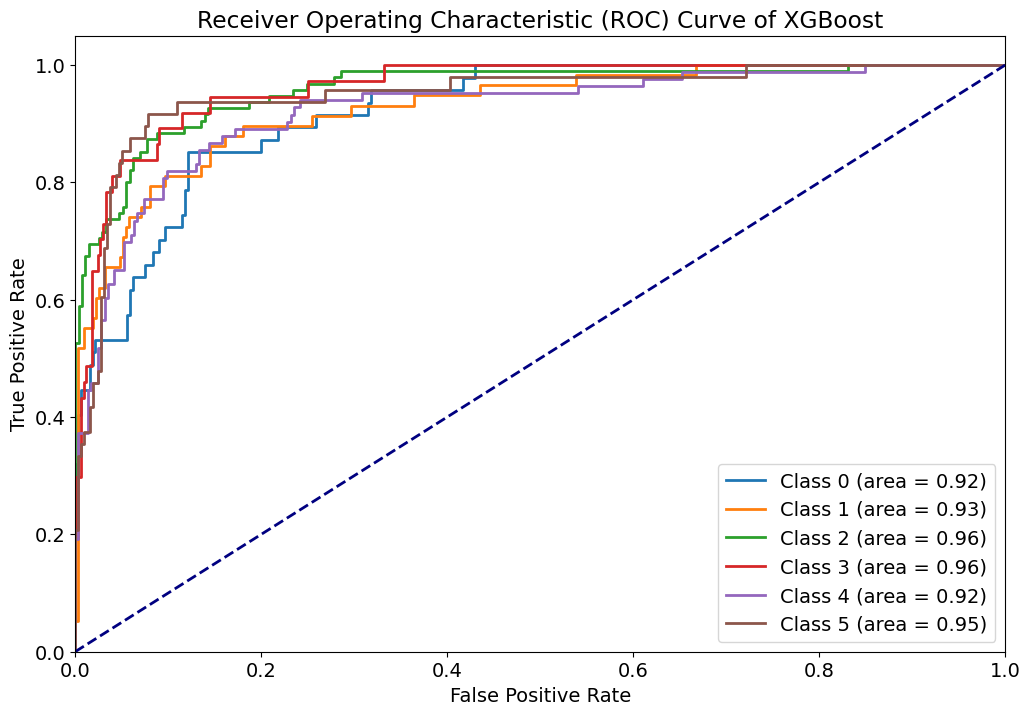

In [ ]:
# le = LabelEncoder()
# df['songname_encoded'] = le.fit_transform(df['songname'])
# df['segment_encoded'] = le.fit_transform(df['segment'])
# df['genre_encoded'] = le.fit_transform(df['genre'])

# # Prepare data
# y = df['genre_encoded']
# X = scale(df.drop(columns=['genre_encoded', 'genre', 'songname', 'segment']), axis=1)

# # Split data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=1)

# Binarize the labels for ROC curve calculation
y_train_bin = label_binarize(y_train, classes=np.unique(y))
y_test_bin = label_binarize(y_test, classes=np.unique(y))

# Train the XGBoost model
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train_bin)

# Predict probabilities
xgb_proba = xgb_clf.predict_proba(X_test)

# Function to plot ROC curve for each class
def plot_roc_curve(y_test_bin, y_score, n_classes):
    plt.figure(figsize=(12, 8))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = roc_auc_score(y_test_bin[:, i], y_score[:, i])
        plt.plot(fpr, tpr, lw=2, label='Class {0} (area = {1:0.2f})'.format(i, roc_auc))

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve of XGBoost')
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC curve for each class
plot_roc_curve(y_test_bin, xgb_proba, n_classes=y_test_bin.shape[1])

<Figure size 1400x600 with 0 Axes>

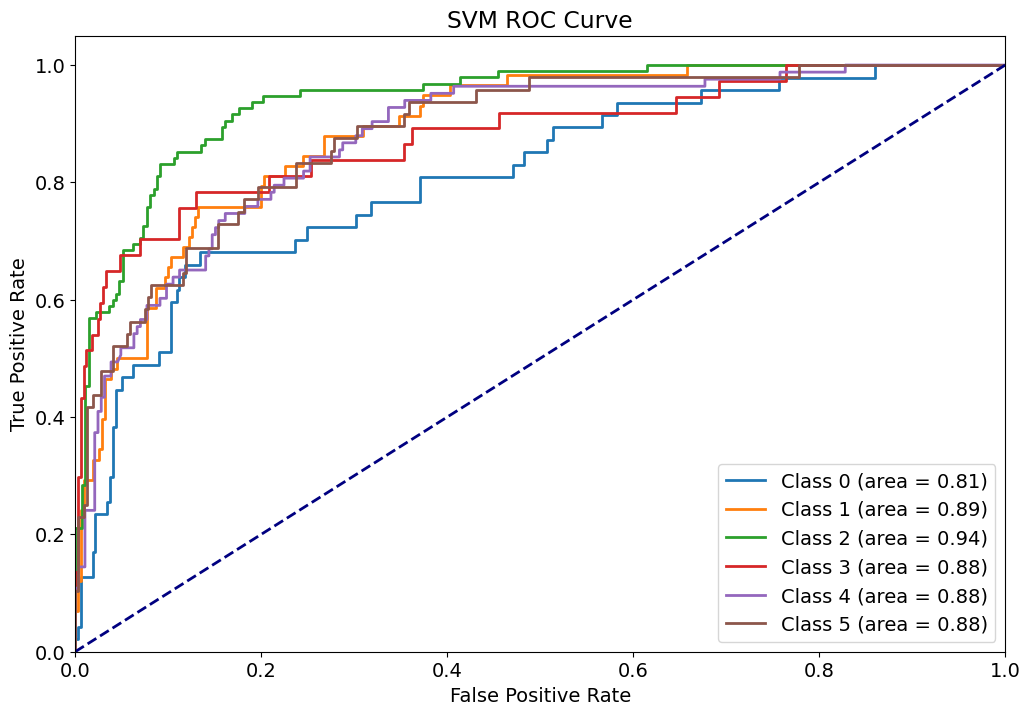

In [ ]:
y_train_bin = label_binarize(y_train, classes=np.unique(y))
y_test_bin = label_binarize(y_test, classes=np.unique(y))

# Train the XGBoost model
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train_bin)

# Predict probabilities for XGBoost
xgb_proba = xgb_clf.predict_proba(X_test)

# Train the SVM model with probability estimates
svm_clf = OneVsRestClassifier(SVC(probability=True))
svm_clf.fit(X_train, y_train_bin)

# Predict probabilities for SVM
svm_proba = svm_clf.predict_proba(X_test)

# Function to plot ROC curve for each class
def plot_roc_curve(y_test_bin, y_score, n_classes, title):
    plt.figure(figsize=(12, 8))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = roc_auc_score(y_test_bin[:, i], y_score[:, i])
        plt.plot(fpr, tpr, lw=2, label='Class {0} (area = {1:0.2f})'.format(i, roc_auc))

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")

# Plot ROC curves for XGBoost and SVM side by side
plt.figure(figsize=(14, 6))

# plot_roc_curve(y_test_bin, xgb_proba, n_classes=y_test_bin.shape[1], title='XGBoost ROC Curve')

plot_roc_curve(y_test_bin, svm_proba, n_classes=y_test_bin.shape[1], title='SVM ROC Curve')

plt.show()


NameError: name 'auc' is not defined

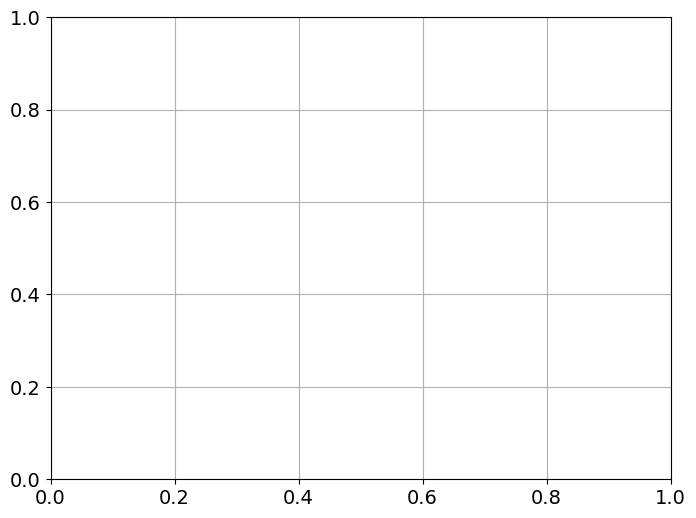

In [ ]:
def roc_curve_and_score(y_test, pred_proba):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(pred_proba.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_test, pred_proba[:, i], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), pred_proba.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    return fpr, tpr, roc_auc


plt.figure(figsize=(8, 6))
matplotlib.rcParams.update({'font.size': 14})
plt.grid()
fpr, tpr, roc_auc = roc_curve_and_score(y_test, xgb_proba)

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"], color='darkorange', lw=2,
         label='ROC AUC={0:.3f}'.format(roc_auc["micro"]))

# Plot ROC curves for individual classes if needed
# ...

plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.legend(loc="lower right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.show()

In [ ]:
le.classes_

array(['anadolu_rock', 'arabesk', 'hip_hop', 'pop', 'turk_sanat', 'turku'],
      dtype=object)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.graph_objects as go

# Assuming df is already defined and contains your data
# Select only numerical columns for PCA
numerical_columns = df.select_dtypes(include=[np.number]).columns
X = df[numerical_columns]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Create the Plotly figure
fig = go.Figure()

# Add a trace for the explained variance
fig.add_trace(go.Scatter(
    x=list(range(1, len(explained_variance) + 1)),
    y=cumulative_explained_variance,
    mode='lines+markers',
    line=dict(dash='dash'),
    marker=dict(size=8)
))

# Update the layout
fig.update_layout(
    title='Explained Variance by Number of Principal Components',
    xaxis_title='Number of Principal Components',
    yaxis_title='Cumulative Explained Variance',
    template='plotly_white',
    width=1000
)

# Show the plot
fig.show()

# Print the explained variance
print("Explained Variance for each component:")
for i, variance in enumerate(explained_variance, start=1):
    print(f"Component {i}: {variance:.4f}")


Explained Variance for each component:
Component 1: 0.2661
Component 2: 0.1000
Component 3: 0.0727
Component 4: 0.0518
Component 5: 0.0474
Component 6: 0.0406
Component 7: 0.0381
Component 8: 0.0359
Component 9: 0.0336
Component 10: 0.0291
Component 11: 0.0262
Component 12: 0.0248
Component 13: 0.0229
Component 14: 0.0215
Component 15: 0.0182
Component 16: 0.0167
Component 17: 0.0157
Component 18: 0.0148
Component 19: 0.0142
Component 20: 0.0135
Component 21: 0.0129
Component 22: 0.0118
Component 23: 0.0107
Component 24: 0.0100
Component 25: 0.0089
Component 26: 0.0072
Component 27: 0.0070
Component 28: 0.0050
Component 29: 0.0041
Component 30: 0.0037
Component 31: 0.0033
Component 32: 0.0032
Component 33: 0.0027
Component 34: 0.0020
Component 35: 0.0017
Component 36: 0.0014
Component 37: 0.0005
Component 38: 0.0001
